In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [2]:
x = np.arange(0, np.pi, 0.1)
y = np.arange(0, 2 * np.pi, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.sin(Y) * 10

In [3]:
colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]
n_bins = [3, 6, 10, 100]
cmap_name = "rgb_cmap"

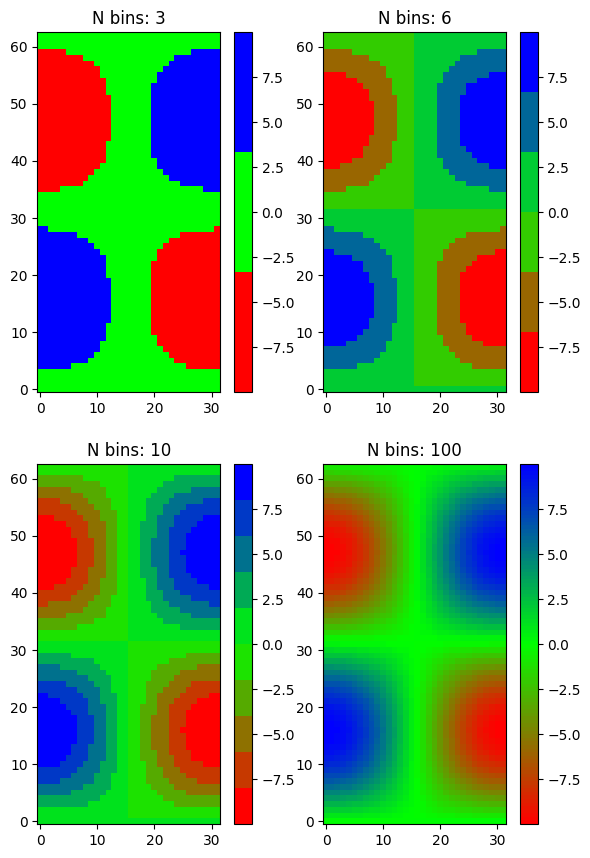

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(6, 9))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)

for n_bin, ax in zip(n_bins, axs.flat):
    cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bin)
    im = ax.imshow(Z, origin="lower", cmap=cmap)
    ax.set_title(f"N bins: {n_bin}")
    fig.colorbar(im, ax=ax)

plt.show()

In [5]:
cdict1 = {
    "red": (
        (0.0, 0.0, 0.0),
        (0.5, 0.0, 0.1),
        (1.0, 1.0, 1.0),
    ),
    "green": (
        (0.0, 0.0, 0.0),
        (1.0, 0.0, 0.0),
    ),
    "blue": (
        (0.0, 0.0, 1.0),
        (0.5, 0.1, 0.0),
        (1.0, 0.0, 0.0),
    )
}

cdict2 = {
    "red": (
        (0.0, 0.0, 0.0),
        (0.5, 0.0, 1.0),
        (1.0, 0.1, 1.0),
    ),
    "green": (
        (0.0, 0.0, 0.0),
        (1.0, 0.0, 0.0),
    ),
    "blue": (
        (0.0, 0.0, 0.1),
        (0.5, 1.0, 0.0),
        (1.0, 0.0, 0.0),
    )
}

cdict3 = {
    "red": (
        (0.0, 0.0, 0.0),
        (0.25, 0.0, 0.0),
        (0.5, 0.8, 1.0),
        (0.75, 1.0, 1.0),
        (1.0, 0.4, 1.0),
    ),
    "green": (
        (0.0, 0.0, 0.0),
        (0.25, 0.0, 0.0),
        (0.5, 0.9, 0.9),
        (0.75, 0.0, 0.0),
        (1.0, 0.0, 0.0),
    ),
    "blue": (
        (0.0, 0.0, 0.4),
        (0.25, 1.0, 1.0),
        (0.5, 1.0, 0.8),
        (0.75, 0.0, 0.0),
        (1.0, 0.0, 0.0),
    )
}

# Make a modified version of cdict3 with some transparency
# in the middle of the range.
cdict4 = {
    **cdict3,
    "alpha": (
        (0.0, 1.0, 1.0),
        # (0.25, 1.0, 1.0),
        (0.5, 0.3, 0.3),
        # (0.75, 1.0, 1.0),
        (1.0, 1.0, 1.0),
    ),
}

In [6]:
blue_red_1 = LinearSegmentedColormap("BlueRed1", cdict1)
blue_red_2 = LinearSegmentedColormap("BlueRed2", cdict2)
blue_red_3 = LinearSegmentedColormap("BlueRed3", cdict3)
blue_red_alpha = LinearSegmentedColormap("BlueRedAlpha", cdict4)

# alternative and better
mpl.colormaps.register(blue_red_1)
mpl.colormaps.register(blue_red_2)
mpl.colormaps.register(blue_red_3)
mpl.colormaps.register(blue_red_alpha)

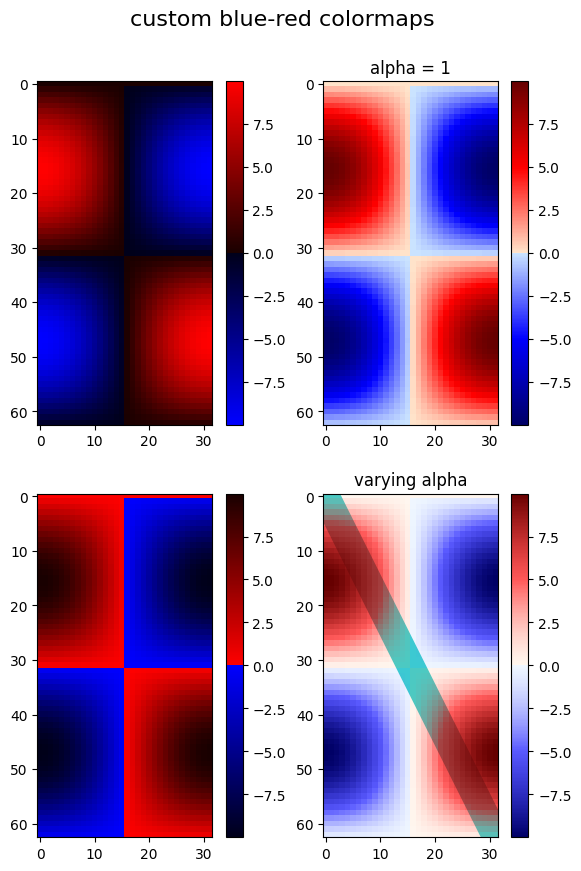

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(6, 9))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)

im1 = axs[0, 0].imshow(Z, cmap=blue_red_1)
fig.colorbar(im1, ax=axs[0, 0])

im2 = axs[1, 0].imshow(Z, cmap="BlueRed2")
fig.colorbar(im2, ax=axs[1, 0])

# Now we will set the third cmap as the default.  One would
# not normally do this in the middle of a script like this
plt.rcParams["image.cmap"] = "BlueRed3"

im3 = axs[0, 1].imshow(Z)
fig.colorbar(im3, ax=axs[0, 1])
axs[0, 1].set_title("alpha = 1")

# Or as yet another variation, we can replace the rcParams
# specification *before* the imshow with the following *after*
# imshow.
# This sets the new default *and* sets the colormap of the last
# image-like item plotted via pyplot, if any.
# Draw a line with low zorder so it will be behind the image.
axs[1, 1].plot([0, 10 * np.pi], [0, 20 * np.pi], color="c", lw=20, zorder=-1)

im4 = axs[1, 1].imshow(Z)
fig.colorbar(im4, ax=axs[1, 1])

im4.set_cmap("BlueRedAlpha")
axs[1, 1].set_title("varying alpha")

fig.suptitle("custom blue-red colormaps", fontsize=16)
fig.subplots_adjust(top=0.9)

plt.show()